<a href="https://colab.research.google.com/github/MaicolLojano/Mineria-de-Datos/blob/main/UNIDAD2/Reconocimiento_placas__Maicol_Lojano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 # Importa la biblioteca OpenCV, que es utilizada para la manipulación y procesamiento de imágenes y video en Python.
from google.colab import files # Importa el módulo files de Google Colab, que permite subir y descargar archivos desde y hacia el entorno de Google Colab.
from IPython.display import Image, display # permite mostrar imágenes directamente en el notebook de Jupyter o Google Colab.

In [ ]:
# Abre un diálogo para que el usuario suba archivos a Google Colab y guarda esos archivos en un diccionario llamado uploaded.
uploaded = files.upload()

Saving imagen_persona.jpg to imagen_persona (1).jpg


In [ ]:
# Obtiene la ruta del primer archivo subido, lee la imagen desde esa ruta y la convierte a escala de grises.
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
#  descarga el archivo XML que contiene el modelo preentrenado para la detección de rostros utilizando cascadas de Haar.
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml


--2024-07-24 17:41:49--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.01s   

2024-07-24 17:41:49 (74.7 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]



In [ ]:
# Carga el clasificador de cascada para la detección de rostros desde el archivo XML especificado.
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


In [ ]:
# Detecta rostros en la imagen en escala de grises gray_image, usando parámetros para ajustar la precisión y el tamaño mínimo de los rostros detectados.
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))


In [ ]:
# Dibuja un rectángulo rojo alrededor de cada rostro detectado en la imagen, usando las coordenadas y dimensiones de los rostros.
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)


Se detectaron 6 rostro(s) en la imagen.


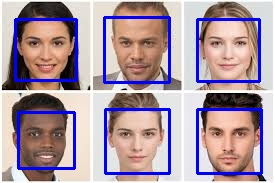

In [ ]:
# Cuenta las caras detectadas, guarda la imagen con los rostros marcados y la muestra.
num_faces = len(faces)
print(f'Se detectaron {num_faces} rostro(s) en la imagen.')
cv2.imwrite('faces_detected.jpg', image)
display(Image('faces_detected.jpg'))

En este ejemplo, primero cargamos una imagen desde nuestro sistema local a Google Colab. Luego, convertimos la imagen a escala de grises y utilizamos el modelo Haar Cascade *para* detectar rostros en la imagen. Finalmente, dibujamos rectángulos alrededor de los rostros detectados y mostramos la imagen resultante con los rostros destacados.

Recuerda que este ejemplo utiliza un modelo Haar Cascade preentrenado, que es una técnica básica para la detección de rostros.